# 5. Labor: Egyszerű Neurális Hálózat implementációja

A gyakorlat során az eddig tanult ismeretekre támaszkodva implementáljuk a lehető legegyszerűbb, egy rejtett réteget tartalmazó (nem deep) MLP (multi-layer preceptron) vagy FF (feed-forward) neurális hálót.

## A XOR probléma

A XOR vagy kizáró vagy művelete egy tipikus iskolapéldája a neurális hálók lehetőségeinek demonstrációira. Ugyan a XOR kérdés könnyen implementálható `if` elágazások segítségével, az adatokat elválasztó nem lineáris (de még csak nem is egy fügvénnyel leírható) határvonal gyakorlatilag megoldhatatlan a hagyományos statisztikai / regressziós modellek segítségével.

## A perceptron

Az eddig alkalmazott Logisztikus regressziós modellt grafikusan az alábbi alakban ábrázolható:

<!--
<center><img src="img/perceptron.svg" width="300"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=1vC5wNfMRNwx8ZRY7h6HLDVHfaeN3ASA1" width="600"></center>


ahol

$$ s = \sum_{i=0}^n(w_i x_i); \qquad \hat{y} = a(s) $$

A modellünk bemenetei az $x_1$ - $x_n$ változók, az ezekhez rendelt súlyok (modellparaméterek) a $w_1$ - $w_n$ értékek (adott esetben kiegészítve a $w_0$ bias paraméterrel), a regressziós értéket valószínűséggé konvertáló `a()`, aktivációs függvény pedig eddig a _sigmoid_ függvény volt. A modell kimenete a $\hat{y}$ becslés, az adott esemény bekövetkezésére. Ezt a struktúrát _perceptronnak_ nevezik. Alakjában és funkciójában nagyon hasonlít egy neuron működésére: a dendriteken beérkező elektromos ingerek (_bemenetek_)súlyozott (_súlyok/modellparaméterek_) összege (_s_) alapján a neuron testében (soma) adott szint elérésekor aktivációs potenciál keletkezik (_aktivációs függvény_), amelyet a neuron az axonon keresztül továbbít ($\hat y$) a következő neuronok felé. A perceptront ezért szokás neuronnak is nevezni ezekben a hálózatokban.

<!--
<center><img src="img/neuron.svg" width="600"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=1AG4xBI_j4rBXvcM-ptJD6G2n8P63s6W_" width="600"></center>



Amennyiben az élő szervezetekhez hasonlóan a perceptronokat több rétegben egymás után kapcsoljuk, megkapjuk a multilayer perceptron / feed forward neural network arkhitektúrát:
<!--
<center><img src="img/mlp.svg" width="600"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=1ZOXMS7y5cOAmB8Mwq7NN6k1Wlo-0CYFw" width="600"></center>

Ebben a az elrendezésben az első réteget (amely nem valódi réteg, csak a bemeneteket jelképezi) bemeneti rétegnek, az utolsó réteget kimeneti rétegnek, a közbülső reteg(ek)et pedig rejtett régenek nevezik. A rejtett és a kimeneti rétegek mindegyikéhez tartoznak:
- $x_i$ bemenetek (ez előző réteg neuronjainak + a mindig egy értéket adó bias neuronnak kimenetei) mint $\mathbf{X}$ bemeneti vektor(sormátrix)
- $w_{i,j}$ súlyok (az $i$-edik bemenethez és a réteg $j$-edik neuronjához tartozó súly) mint $\mathbf{W}$ súlymátrix
- $\hat y_j$ kimenetek mint $\mathbf{\hat Y}$ kimeneti vektor (sormátrix)

Egy $k$-adik réteg $j$-edik neuronjának kimenete a perceptron modell szerint:
$$\hat y_j^{(k)} = a\left( s_j^{(k)} \right) = a\left( w_0^{(k)} + \sum_{i=0}^{n}(w_{i,j}^{(k)} x_i^{(k)}) \right)$$

A teljes $k$-adik réteg kimenete  mártrixos alakban pedig:
$$\mathbf{\hat Y}^{(k)} = a\left( \mathbf{S}^{(k)} \right) = a\left( \mathbf{W}^{(k)} \cdot \mathbf{X}^{(k)} \right)$$

Amennyiben egyszerre több bemenetia datpontra történik a számítás, úgy mind az $\mathbf{X}$, $\mathbf{S}$ és $\mathbf{\hat Y}$ egyetlen sor helyett az adatpontok számának megfelelő számú sorral rendelkeznek.

## Forward propagation - predikció neurális hálóval

A neurális hálók esetén a bemeneti adatainkat a bemeneti rétegen elindítva, az információ rétegről rétegre halad át a modellen, azaz információ a bemenetektől a kimenetig (előrefele) terjed, *'propagál'*. Vizsgáljuk meg, hogy hogyan fognak alakulni az egyes mátrixok méretei, miközben ez a folyamat végbemegy.

A bemeneti mátrixunk az eddigiekkel megegyezően néz ki, minden sora egy-egy külön bemeneti adatpont, oszlopai tartalmazzák az egyes bementi változókat:

$$
\underset{[m \ \times \ n(k-1)+1]}{\mathbf{X}^{(k)}} = \left[
	\begin{array}{ccccc}
 		1 & x_{1,1}^{(k)} & x_{1,2}^{(k)} & \ldots & x_{1,n(k-1)}^{(k)}\\
		1 & x_{2,1}^{(k)} & x_{2,2}^{(k)} & \ldots & x_{2,n(k-1)}^{(k)}\\
 		\vdots & \vdots & \vdots & \ddots & \vdots\\
        1 & x_{m,1}^{(k)} & x_{m,1}^{(k)} & \ldots & x_{m,n(k-1)}^{(k)}\\
	\end{array}	\right]
$$
ahol $n(k)$ a $k$-adik réteg neuronjainak száma.

A súlyokat tartalamzó mátrixból eddig csak egy darab szerepelt, annak pedi egy darab oszlopa volt. Az MLP struktúra esetén minden réteghez (leszámítva a bemeneti réteget) külön mátrix tartozik. Minden rétegben, neurononként egy oszlop tartalmazza az adott súlyokat, az egyes oszlopok az adott réteg adott neuronjaihoz tartoznak:

$$
\underset{[n(k-1)+1 \ \times \ n(k)]}{\mathbf{W}^{(k)}} = \left[
	\begin{array}{ccccc}
 		w_{0,1} & w_{0,2} & \ldots & w_{0,n(k))}\\
		w_{1,1} & w_{1,2} & \ldots & w_{1,n(k)}\\
 		\vdots & \vdots & \ddots & \vdots\\
        w_{n(k-1),1} & w_{n(k-1),2} & \ldots & w_{n(k-1),n(k)}\\
	\end{array}\right]
$$
ahol $n(k)$ az n. rétegben található neuronok száma, $n(k-1)$ pedig az azt megelőző réteg neuronjainak száma.

A $k$ réteg kimeneteinek alakulása:
$$\underset{[m \ \times \ n(k)]}{\mathbf{\hat{Y}}^{(k)}} = a\left(\underset{[m \ \times \ n(k)]}{\mathbf{S}^{(k)}}\right) = a\left(\underset{[m \ \times \ n(k-1)+1]}{\mathbf{X}^{(k)}} \cdot \underset{[n(k-1)+1 \ \times \ n(k)]}{\mathbf{W}^{(k)}} \right)$$
$$\underset{[m \ \times \ n(k-1)+1]}{\mathbf{X}^{(k)}} = \underset{[m \ \times \ 1]}{BIAS} + \underset{[m \ \times \ n(k-1)]}{\mathbf{Y}^{(k-1)}}$$
ahol $a$ az adott rétegben haszált aktivációs függvény. A tárgy keretében csak a _sigmoid_ függvénnyel foglalkoztunk, mint aktivációs függvény, de számos másik létezik (_identity_, _tanh_, _ReLU_, _LeakyReLU_, stb.), amelyek közül szinte akármelyik szabadon alkalmazható. Az egyetlen megkötés általában az utolós rétegnél van, ahol a költségfüggvényhez hasonlóan egyeztetni kell az aktivációs függvényt a feladattal, hiszen ez határozza meg, hogy  a kimenet milyen tartományú lehet.:
- regresszió --> MSE & identitás aktivációs függvény
- bináris klasszifikáció --> BCE & sigmoid aktivációs függvény

Egy egyszerű, 2 bemeneti neuront és egy  rejtett rétegben 3 neuront tartalmazó bináris klasszifikációt megvalósító háló esetén a mátrixok méretének alakulása a forward propagation folyamán:
- a rejtett rétegre
$$ \underset{m \ \times \ 3}{\mathbf{X^{(1)}}} =  \underset{m \ \times \ 1}{BIAS} + \underset{m \ \times \ 2}{\mathbf{X}} $$
$$ \underset{m \ \times \ 3}{\mathbf{S^{(1)}}} = \underset{m \times 3}{\mathbf{X^{(1)}}} \times \underset{ 3 \ \times \ 3}{\mathbf{W^{(1)}}} $$
$$ \underset{m \ \times \ 3}{\mathbf{\hat{Y}}^{(1)}} = sigmoid(\underset{m \ \times \ 3}{{\mathbf{S}^{(1)}}}) $$
- a kimeneti rétegre
$$ \underset{m \times 4}{\mathbf{X^{(2)}}} = \underset{[m \ \times \ 1]}{BIAS} + \underset{m \ \times \ 3}{\mathbf{\hat{Y}}^{(1)}} $$
$$ \underset{m \ \times \ 1}{\mathbf{S^{(2)}}} = \underset{m \times 4}{\mathbf{X^{(2)}}} \times \underset{ 4 \ \times \ 1}{\mathbf{W^{(2)}}} $$
$$ \underset{m \ \times \ 1}{\mathbf{\hat{Y}}^{(2)}} = sigmoid(\underset{m \ \times \ 1}{{\mathbf{S}^{(2)}}}) $$
Az utolsó rétegünk kimenete maga a modell által adott becslés.
$$ \underset{m \ \times \ 1}{\mathbf{\hat{Y}}} = \underset{m \ \times \ 1}{\mathbf{\hat{Y}}^{(2)}} $$



## BackPropagation - neurális háló tanítása

### Kimeneti réteg

A neurális hálók esetén a gradiens módszer elve nem változik. Az egyes súlyokat a költségfüggvény adott súly szerinti parciális deriváltjának alapján módosítjuk, azonban a gradiens számítása jelentősen komplikáltabb, számítására a lánc szabályt használhatjuk. A gradiens számítását a kimeneti réteghez tartozó súlyokra ($p$ réteget - $1$ bemeneti + $p-1$ rejtett + $1$ kimeneti - tartalmazó háló esetén):

$$ \nabla_{(p)} C \approx \frac{\partial C}{\partial \mathbf{W}^{(p)}} =
\frac{\partial C}{\partial \mathbf{\hat  Y}^{(p)}} \frac{\partial \mathbf{\hat  Y}^{(p)}}{\partial \mathbf{S}^{(p)}} \frac{\partial \mathbf{S}^{(p)}}{\partial \mathbf{W}^{(p)}} $$

A parciális derivált egyes tagjati végigszámolva az alábbi összefüggésekre jutunk:

$$ \boxed{ \frac{\partial C}{\partial \mathbf{W}^{(p)}} =  \left(\mathbf{X}^{(p)}\right)^T \left( \frac{\partial C}{\partial \mathbf{\hat  Y}} a'(\mathbf{S}^{(p)}) \right)  = \left(\mathbf X^{(p)}\right)^T \cdot \mathbf \delta^{(p)} } $$


A *BCE* költségfüggvény és a *sigmoid* aktiváció együttes használatakor
$$ \boxed{\mathbf \delta^{(p)} = \frac{1}{m} \left(\mathbf{\hat Y} - \mathbf{Y} \right) = \frac{1}{m} \left(sigmoid(\mathbf{X}^{(p)}\cdot \mathbf{W}^{(p)} ) - \mathbf{Y} \right)}$$

Látható, hogy visszakaptuk az egyzserű logisztikus regresszió esetén alkalmazott gradiensvektort. 

### Rejtett rétegek

A $k$ rejtett réteg esetében a gradiensek számítása a következőként írható fel:

$$ \nabla_{(k)} C \approx \frac{\partial C}{\partial \mathbf{W}^{(k)}} =
\frac{\partial C}{\partial \mathbf{\hat  Y}^{(k)}} \frac{\partial \mathbf{\hat  Y}^{(k)}}{\partial \mathbf{S}^{(k)}} \frac{\partial \mathbf{S}^{(k)}}{\partial \mathbf{W}^{(k)}} $$

A kifejezést átalakítva az alábbi összefüggésekre jutunk:

$$ \boxed{ \frac{\partial C}{\partial \mathbf{W}^{(k)}} =  \left(\mathbf{X}^{(k)}\right)^T \left( \frac{\partial C}{\partial \mathbf{\hat  Y}^{(k)}} a'(\mathbf{S}^{(k)}) \right)  = \left(\mathbf X^{(k)}\right)^T \cdot \mathbf \delta^{(k)} } $$

A $k$ réteghez tartozó delta tag számítása azonben nem triviális:

$$ \mathbf{\delta^{(k)}} = \frac{\partial C}{\partial \mathbf{\hat  Y^{(k)}}} a'(\mathbf{S^{(k)}}) $$

A lánc szabály alkalmazásával a költségfüggvény parciális deriváltjai a $k$ réteg kimenetei szerint:

$$\frac{\partial C}{\partial \mathbf{\hat  Y}^{(k)}} = \frac{\partial C}{\partial \mathbf{\hat  Y}^{(k+1)}} \frac{\partial \mathbf{\hat  Y}^{(k+1)}}{\partial \mathbf{S}^{(k+1)}} \frac{\partial \mathbf{S}^{(k+1)}}{\partial \mathbf{X}^{(k+1)}} \frac{\partial \mathbf{X}^{(k+1)}}{\partial \mathbf{Y}^{(k)}}$$

$$ \frac{\partial C}{\partial \mathbf{\hat  Y}^{(k)}} = \left( \frac{\partial C}{\partial \mathbf{\hat  Y^{(k+1)}}} a'(\mathbf{S^{(k+1)}}) \cdot \left(\mathbf{W}^{(k+1)}_{-BIAS}\right)^T \right) = \left( \mathbf{\delta^{(k+1)}} \cdot \left(\mathbf{W}^{(k+1)}_{-BIAS}\right)^T \right)$$

**Itt az $()_{-BIAS}$ tag azt jelképezi, hogy a BIAS neuronhoz tartozó megfelelő tagokat el kell távolítanunk a súlymátrixból!** Azok ugyanis a $k$-adik réteg BIAS neuronjához tartozó $\delta$ érétkhez vezetnek, azonban annak nincsenek bemenetei, így súlyok sem tartoznak hozzá, 'zsákutcába' vezet.

A fentiek alapján tehát $\mathbf{\delta^{k}}$ teljes számítása:

$$\boxed{ \mathbf{\delta^{(k)}} = \left( \mathbf \delta^{(i+1)} \cdot \left( \mathbf W^{(i+1)}_{-BIAS} \right)^T \right) a'\left(\mathbf s^{(i)} \right) }$$

**Fontos megjegyezni, hogy az itt alkalmazott Mátrix szerint vett parciális derivált nem egy matematikalag definált művelet, itt alkalmazott jelentése a mátrix egyes elemei szertint vett parciális deriváltak, az eredeti mátrixnak megfelelő alakba rendezve.** A backpropagation teljes matematikai levezetését lásd az _Appendix_ részben.

A fentiek alapján a BackProp algoritmus folyamata a háló minden súlyához tartozó gradiens kiszámítására:
 - Kimeneti réteghez tartozó $\mathbf{\delta}$ számítása (költségfüggvény és kimeneti réteg aktivációs függvénye alapján)
 - Rejtett rétegekhez tartozó $\mathbf{\delta}$ számítása hátulról előrefelé
 - Súlymódosítások mátrixának számítása minden rétegre a réteghez tartozó $\mathbf{\delta}$ és $\mathbf{X}$ értékek alapján
 - Súlyok fissítése a számolt súlymódosításoknak és a tanulási rátának megfelelően

A $\mathbf{\delta}$ értékek számításához szükséges az aktivációs függvény deriváltja is. Ez a _sigmoid_ függvény esetében:
$$ \boxed{ \frac{d}{dz}sigmoid(z) = sigmoid(z)(1-sigmoid(z))} $$

## 00: Könyvtár importálások

Első lépésként importáljuk a feladat megoldása során használt könyvtárakat. Esetünkben ezek a következők lesznek:
- Numpy a matematikia műveletek elvégzéséhez
- Pandas az adatok beolvasásához és kezeléséhez
- MatPlotLib.pyplot az eredményeink ábrázolásához
- Plotly Express interaktív vizualizációhoz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Használjuk ezeket sötét téma esetén
plt.style.use('dark_background')
styleTemplate = 'plotly_dark'

# Használjuk ezeket világos téma esetén
#plt.style.use('default')
#styleTemplate = 'plotly_white'

## 01: Adatgenerálás
Az eddigiekkel eltérő módon most nem egy előre adott adatokkal dolgozunk. A XOR probléma adatstruktúrája viszonylag egyszerű, az adatokat magunknak generálhatjuk. Így tetszőleges számú adatot használhatunk.

In [2]:
# GENERATE XOR DATA
nSamples = 100 # total samples = 4*nSamples
clusters = [[-0.5, -0.5, 0], [-0.5, 0.5, 1], [0.5, -0.5, 1], [0.5, 0.5, 0]]
std = 0.25
rng = np.random.default_rng(42)

X = np.ones([4*nSamples, 2])
Y = np.ones([4*nSamples, 1])
for count, params in enumerate(clusters):
    X[count*nSamples:(count+1)*nSamples, 0] = rng.normal(params[0], std, nSamples)
    X[count*nSamples:(count+1)*nSamples:,1] = rng.normal(params[1], std, nSamples)
    Y[count*nSamples:(count+1)*nSamples] = params[2]

## 02: Adatfelfedezés

A szintetikus, generált adatok esetén is érdemes előzetes adatfelfedezést / adatvizualizációt alkalmazni. Így ellenőrizni tudjuk, hogy biztodan oylan adatokat generáltunk-e, mint szerettünk volna.

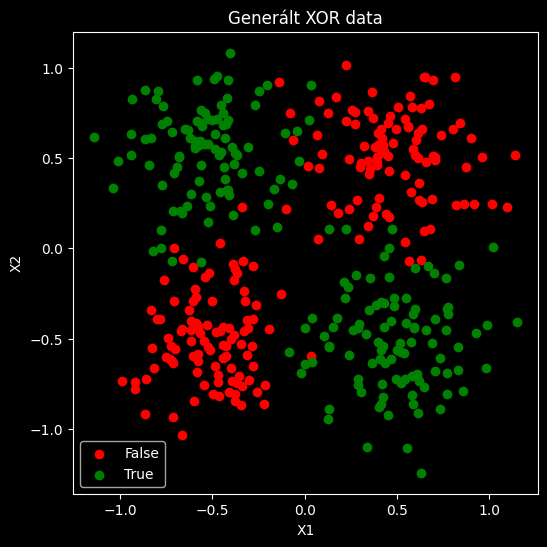

In [3]:
plt.figure(figsize=(6, 6))
falseData = X[Y[:,0] == 0, :]
trueData = X[Y[:,0] == 1, :]

plt.scatter(falseData[:, 0], falseData[:, 1], marker='o', c="r", label="False")
plt.scatter(trueData[:, 0], trueData[:, 1], marker='o', c="g", label="True")

plt.title("Generált XOR data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc='lower left')

plt.show()

A generált adataink ebben az esetben már megfelelnek a tanításra, a tartományukból adódóan normalizálásra nincs szükség. A bias tag implementációját most a modellen belül oldjuk meg.

## 03: Modell implementálása

Először implementáljuk az aktivációs függvényként használt `sigmoid()` függvényt. Mivel a hálónk tanításához szükségünk lessz a sigmoid deriváltjának számítására is, az implementációnkba ezt is belefoglaljuk.

**Feladat:** implementálja a `sigmoid()` aktivációs függvényt, amely második bementeként egy `bool` értéket vár, ami alapján vagy a *sigmoid* függvényt vagy annak a deriváltját számítja.

In [8]:
def sigmoid(z, derivate = False):       # Alapértelmezett a rendes sigmoid érték számítása
######################################
    g = 1/(1+np.exp(-z))
    if (derivate):
        g = g*(1-g)
######################################
    return g

Az implementációnkat most vizuálisan ellenőrizzük.

In [9]:
x = np.linspace(-6, 6, 100)
y = sigmoid(x)
dy = sigmoid(x, derivate = True)

fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = y, mode='lines', name ='sigmoid'))
fig.add_trace(go.Scatter(x = x, y = dy, mode='lines', name = 'derivate of sigmoid'))

fig.update_layout(
    template='plotly_dark',
    xaxis_title = "z",
    title = "Sigmoid függvény",
    width=600,
    height=320,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y = 1.02,
        xanchor="center",
        x = 0.5)
)

fig.update_traces(line=dict( width=3))
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='grey', zeroline=True, zerolinewidth=3, zerolinecolor='grey')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='grey', zeroline=True, zerolinewidth=3, zerolinecolor='grey')

fig.show()

Szintén külön függvényként definiáljuk a bemeneti mátrix biassal való kiegészítését.

In [10]:
def addBias(z):
    return np.hstack([np.ones([z.shape[0] ,1]), z])

Bias kiegészítés tesztelése:

In [11]:
testX = np.array([[0.3146, -0.65432, 0.24], [-1.0123, -0.4215, -0.12412], [0.2351, 0.7533456, 2.346]])
print(addBias(testX))

[[ 1.         0.3146    -0.65432    0.24     ]
 [ 1.        -1.0123    -0.4215    -0.12412  ]
 [ 1.         0.2351     0.7533456  2.346    ]]


A neurális háló implementálásához és tanításához szükséges metódusokat és adattagokat most egy osztályba rendezve implementáljuk. A még nem üres metódusokat egy `pass` utasítással feltöltve elkerülhetjük, hogy a futtatás során hibát jelezzen, így egyenként ellenőrizhetjük a metódusainkat.

**Feladat:** implementálja a súlyok incializálását véletlenszerű, -1 és 1 közötti egyeneletes eloszlásból származó értékekkel (használjon ehhez _list comprehension_ alakot)!

**Feladat:** implementálja a háló `forwardProp()` metódusát, amely elvégzi az adott bemeneti adatokra a előreterjesztés lépését! A metódus töltse fel az osztály belső X[k] és Yhat[k] listákat a megfelelő értékekkel! Az implementáció ellenőrzésére használja a forwardProp tesztelő cellát az osztálydefiníció alatt.

**Feladat:** implementálja a háló `backProp()` metódusát, amely a backPropagation módzser segítségével kiszámolja az egyes súlyokhoz tartozó gradienseket. Az implementáció ellenőrzésére használja a backProp tesztelő cellát az osztálydefiníció alatt.

In [39]:
class FeedForwardNN:
    def __init__(self, layerSizes, activationFunction, seed):
        self.layerSizes = layerSizes            # Háló konfigurációja
        self.a = activationFunction             # Aktivációs függvény (később más aktivációs függvény is alkalmazható)
        self.noLayers = len(layerSizes)-1       # Rétegek száma (iterációhoz, bemeneti réteg nélkül)
        self.inputSize = layerSizes[0]          # Bemeneti változók (input feature) száma
        self.Yhat = []                             # Lista az egyes rétegek kimenetének tárolására
        self.X = []                             # Lista az egyes rétegek bemenetének tárolására
        self.W = []                             # Lista a rétegekhez tartozó súlyoknak
        self.initWeights(seed)                  # Súlyok inicializálása
    
    def initWeights(self, seed = None):
        rng = np.random.default_rng(seed)
        # Weight matrix dimension are based on number of neurons in previous and current layer
        ######################################
        self.W = []
        for i in range(0, self.noLayers):
            W = rng.uniform(low = -1.0, high = 1.0, size = [self.layerSizes[i] + 1, self.layerSizes[i+1]])
            self.W += [W]
        
        # List comprehension 
        #self.W = [rng.uniform(low = -1.0, high = 1.0, shape = [self.layerSizes[i] + 1, self.layerSizes[i+1]]) for i in range(self.noLayers)]
        
        ######################################

    def checkInputSize(self, X):
        if X.shape[1] != self.inputSize:
            raise ValueError('Unexpected number of input features! Expected {} features but got {}.'.format(self.inputSize, X.shape[1])) 

    def forwardProp(self, X):
        self.checkInputSize(X)

        self.X = [[] for i in range(self.noLayers)]
        self.Yhat = [[] for i in range(self.noLayers)]
        
        ######################################
        #A legelső rétege setében más lesz
        self.X[0] = addBias(X)
        self.Yhat[0] = self.a(self.X[0]@self.W[0])

        for i in range(1, self.noLayers-1):
          self.X[i] = addBias(self.Yhat[i-1])
          self.Yhat[i] = self.a(self.X[i]@self.W[i])

        # Valamint az utolsóban is. (itt lehetőség van a kimeneten mind logisztikus mint ... változót használni)
        self.X[-1] = addBias(self.Yhat[-2])
        self.Yhat[-1] = self.a(self.X[-1]@self.W[-1])
        ######################################

    def predict(self, X):
        self.forwardProp(X)
        return self.Yhat[-1]

    def costBCE(self, X, Y):
        eps = 10e-15
        self.forwardProp(X)
        return np.mean(-Y*np.log(self.Yhat[-1]+eps)-(1-Y)*np.log(1-self.Yhat[-1]))

    def backProp(self, trueY):
        ######################################
        deltas = [[] for i in range(self.noLayers)]

        m = trueY.shape[0]
        deltas[-1] = 1/m * (self.Yhat[-1] - trueY)
        for i in range(self.noLayers - 2, -1, -1):
            deltas[i] = (deltas[i+1]@self.W[i+1][1:,:].T * self.a(self.X[i]@self.W[i], derivate = True))

        dW = [self.X[i].T@deltas[i] for i in range(self.noLayers)]


        
        


        
        ######################################
        return dW

    def updateWeights(self, learning_rate, dW):
        for i in range(self.noLayers):
            self.W[i] = self.W[i] - learning_rate * dW[i]

    def fit(self, X, Y, learning_rate, epochs):
        C_history = np.zeros([epochs+1])
        C_history[0] = self.costBCE(X, Y)    # Forwardprop megtörténik
        print('''
        \%\%\% ------- TANÍTÁS ------- \%\%\%
        ''')
        for i in range(epochs):
            dW = self.backProp(Y)
            self.updateWeights(learning_rate, dW)
            C_history[i+1] = self.costBCE(X,Y) # Forwardprop megtörténik

            if ((i+1) % 250) == 0:
                
                print('Epoch {} / {} completed. Cost value:{}'.format(i+1, epochs, C_history[i+1])) 

        return C_history

Teszteljük az egyes metódusokat, hogy megbizonyosodjunk az elvárt működésről!

In [40]:
layerSizes = [2, 3, 1]
seed = 42

testNN = FeedForwardNN(layerSizes, sigmoid, seed)

testX = np.array([[0.3146, -0.65432], [-1.0123, -0.4215], [0.2351, 0.7533456]])
testY = np.array([[0], [1], [1]])

In [41]:
# Test initweights
print('''Expected initial weights with layer sizes {0} and random seed {1}:
[array([[ 0.5479121 , -0.12224312,  0.71719584],
       [ 0.39473606, -0.8116453 ,  0.9512447 ],
       [ 0.5222794 ,  0.57212861, -0.74377273]]), array([[-0.09922812],
       [-0.25840395],
       [ 0.85352998],
       [ 0.28773024]])]'''.format(layerSizes, seed))
print('''Actual initial weights with layer sizes {0} and random seed {1}:
{2}'''.format(layerSizes, seed, testNN.W))

Expected initial weights with layer sizes [2, 3, 1] and random seed 42:
[array([[ 0.5479121 , -0.12224312,  0.71719584],
       [ 0.39473606, -0.8116453 ,  0.9512447 ],
       [ 0.5222794 ,  0.57212861, -0.74377273]]), array([[-0.09922812],
       [-0.25840395],
       [ 0.85352998],
       [ 0.28773024]])]
Actual initial weights with layer sizes [2, 3, 1] and random seed 42:
[array([[ 0.5479121 , -0.12224312,  0.71719584],
       [ 0.39473606, -0.8116453 ,  0.9512447 ],
       [ 0.5222794 ,  0.57212861, -0.74377273]]), array([[-0.09922812],
       [-0.25840395],
       [ 0.85352998],
       [ 0.28773024]])]


In [42]:
# Test forwardProp & Predict
testPred = testNN.predict(testX)

print('''Expected prediction for test parameters:
[[0.56445555]
 [0.610119  ]
 [0.58247854]]'''.format(layerSizes, seed))
print('''Actual prediction for test parameters:
{0}'''.format(testPred))

Expected prediction for test parameters:
[[0.56445555]
 [0.610119  ]
 [0.58247854]]
Actual prediction for test parameters:
[[0.56445555]
 [0.610119  ]
 [0.58247854]]


In [43]:
# Test backprop
testNN.forwardProp(testX)
testdW = testNN.backProp(testY)

print('''Expected weight change values for test parameters:
[array([[ 0.00351405, -0.02095111, -0.01093665],
       [-0.0105734 ,  0.03069215,  0.00971723],
       [ 0.00944793, -0.034079  , -0.0086122 ]]), array([[-0.0809823 ],
       [-0.05584407],
       [-0.09301554],
       [ 0.00406624]])]''')

print('''Actual prediction for test parameters:
{0}'''.format(testdW))

Expected weight change values for test parameters:
[array([[ 0.00351405, -0.02095111, -0.01093665],
       [-0.0105734 ,  0.03069215,  0.00971723],
       [ 0.00944793, -0.034079  , -0.0086122 ]]), array([[-0.0809823 ],
       [-0.05584407],
       [-0.09301554],
       [ 0.00406624]])]
Actual prediction for test parameters:
[array([[ 0.00351405, -0.02095111, -0.01093665],
       [-0.0105734 ,  0.03069215,  0.00971723],
       [ 0.00944793, -0.034079  , -0.0086122 ]]), array([[-0.0809823 ],
       [-0.05584407],
       [-0.09301554],
       [ 0.00406624]])]


## 04: Modell tanítása

Amennyiben minden tesztünkön megfelelő eredményt kaptunk, végezzük el a háló tanítását a `.fit()` metódus segítségével, és ábrázoljuk a költségfüggvény alakulását.


        \%\%\% ------- TANÍTÁS ------- \%\%\%
        
Epoch 250 / 3000 completed. Cost value:0.6730152112465262
Epoch 500 / 3000 completed. Cost value:0.49954757246246273
Epoch 750 / 3000 completed. Cost value:0.26208126924835023
Epoch 1000 / 3000 completed. Cost value:0.18104237541168786
Epoch 1250 / 3000 completed. Cost value:0.14907025751545241
Epoch 1500 / 3000 completed. Cost value:0.13322985314935493
Epoch 1750 / 3000 completed. Cost value:0.12440886016442096
Epoch 2000 / 3000 completed. Cost value:0.11907639975714396
Epoch 2250 / 3000 completed. Cost value:0.11562153540036825
Epoch 2500 / 3000 completed. Cost value:0.11324305347311672
Epoch 2750 / 3000 completed. Cost value:0.11151660200508441
Epoch 3000 / 3000 completed. Cost value:0.11020436610535694


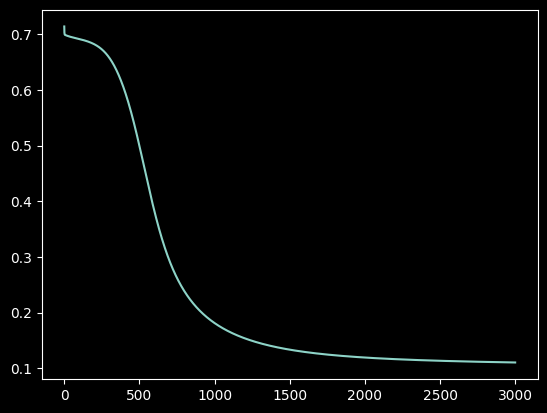

In [44]:
learning_rate = 0.5
trainNN = FeedForwardNN([2, 10, 1], sigmoid, 42)

C_history = trainNN.fit(X, Y, learning_rate, 3000)
plt.plot(range(C_history.size), C_history)

## 05: Modell értékelése

A beépített `predict()` függvénynek köszönhetően a vizualizálhatjuk az hálónk döntési stratégiáját, vizualizálhatjuk a működést 2D-ben contúrvonalakkal, vagy 3D-ben a teljes illesztett felületet ábrázolva.

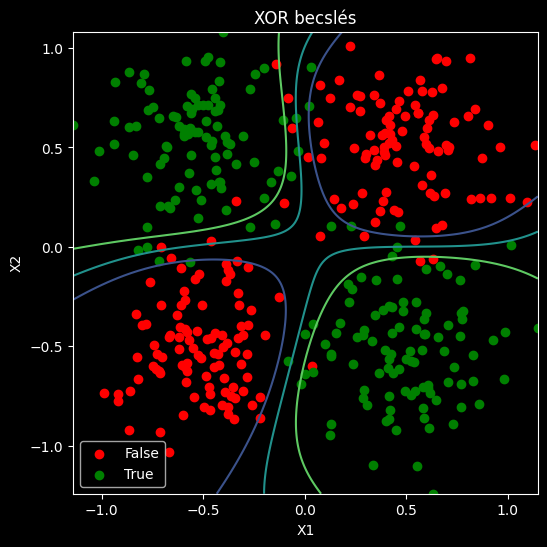

In [45]:
plt.figure(figsize=(6, 6))
falseData = X[Y[:,0] == 0, :]
trueData = X[Y[:,0] == 1, :]

plt.scatter(falseData[:, 0], falseData[:, 1], marker='o', c="r", label="False")
plt.scatter(trueData[:, 0], trueData[:, 1], marker='o', c="g", label="True")

x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 200)    # grid létrehozása
x2 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 200)    # második paraméter

z=np.zeros((len(x1),len(x2)))                          # eredményváltozó 1 inicializálása

for i in range(len(x1)):                                 # valószínűség számolása a teljes háló felett
    for j in range(len(x2)):     
        testPoint = np.array([[x1[i], x2[j]]])
        z[i,j] = trainNN.predict(testPoint)

plt.contour(x1, x2,z.transpose(), 3)                                  # kirajzoljuk contour plottal a döntési határt                                # kirajzoljuk contour plottal a döntési határt


plt.title("XOR becslés")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc='lower left')

plt.show()

A beépített `predict()` fügvénynek köszönhetően a teljes illesztett felületet is vizualizálhatjuk.

In [46]:
# Ábrázolás Plotly-val
fig = go.Figure()

# A magyarázott változót transzponálni kell a helyes megjelenítésért.
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=Y[:,0], mode= "markers"))
fig.add_trace(go.Surface(x=x1, y=x2, z=z.T, colorscale ='Blues'))

#Plot formázása
fig.update_layout(
    title = "XOR becslés",
    scene = dict(
        xaxis_title = "x1",
        yaxis_title = "x2",
        zaxis_title = "Prob"),
    template=styleTemplate,
    width=750,
    height=500,
)

#Plot megjelenítése
fig.show()

# 06: További tesztelés

A gyakorlat keretében a tesztelést csak az illesztett felület vizualizásársa, illetve a költség alakulására korlátoztuk. Az eddig tanult egyéb ismeretek alapján érdemes egyéni munkában a hálót módosítani, kiegészítgetni, pl.: accuracy számolás implementálása és nyomonkövetése a tanulás során, animáció készítés a döntési határ alakulásáról a tanulás során, vagy a regularizásciós technikák implementálása és hatásuknak vizsgálata.

## XX: Megoldás Tensorflow könyvtár segítségével

Az egyik legelterjedteb deep learning könyvtár a google által fejlesztett Tensorflow, amelyre épül a Keras mint magasabb absztrakciós szintű wrapper. A fenti XOR probléma megoldása a Keras könyvtárral pár sorral megoldható, a könyvtárban implementált függvények jól optimalizáltak.

In [47]:
# tömbkezelés és ábrázolás
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Keras modulok importálása
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

# GENERATE XOR DATA
nSamples = 100 # total samples = 4*nSamples
clusters = [[-0.5, -0.5, 0], [-0.5, 0.5, 1], [0.5, -0.5, 1], [0.5, 0.5, 0]]
std = 0.25
rng = np.random.default_rng()

X = np.ones([4*nSamples, 2])
Y = np.ones([4*nSamples, 1])
for count, params in enumerate(clusters):
    X[count*nSamples:(count+1)*nSamples, 0] = rng.normal(params[0], std, nSamples)
    X[count*nSamples:(count+1)*nSamples:,1] = rng.normal(params[1], std, nSamples)
    Y[count*nSamples:(count+1)*nSamples] = params[2]

# Keras háló definiálása
model = Sequential()
model.add(Dense(10, input_shape=(2,)))
model.add(Activation('sigmoid'))                            

model.add(Dense(1))
model.add(Activation('sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['binary_crossentropy'], optimizer=SGD(learning_rate=0.5))

# training the model and saving metrics in history
history = model.fit(X, Y, epochs=500, verbose = 2)

# plotting the metrics
fig = plt.figure()
plt.plot(history.history['binary_crossentropy'])
plt.title('model loss')
plt.ylabel('binary_crossentropy')
plt.xlabel('epoch')
plt.legend(['train'])

# plotting fitted surface
x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 200)    # grid létrehozása
x2 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 200)    # második paraméter

z=np.zeros((len(x1),len(x2)))                          # eredményváltozó 1 inicializálása
testPoints = np.zeros([len(x1)*len(x2), 2])
for i in range(len(x1)):                                 # valószínűség számolása a teljes háló felett
    for j in range(len(x2)):     
        testPoints[i*len(x1)+j,:] = np.array([[x1[i], x2[j]]])

z = model.predict(testPoints, verbose = 0).reshape([len(x1), len(x2)])

# Ábrázolás Plotly-val
fig = go.Figure()

# A magyarázott változót transzponálni kell a helyes megjelenítésért.
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=Y[:,0], mode= "markers"))
fig.add_trace(go.Surface(x=x1, y=x2, z=z.T, colorscale ='Blues'))

#Plot formázása
fig.update_layout(
    title = "XOR becslés",
    scene = dict(
        xaxis_title = "x1",
        yaxis_title = "x2",
        zaxis_title = "Prob"),
    template='plotly_dark',
    width=750,
    height=500,
)

#Plot megjelenítése
fig.show()

ModuleNotFoundError: No module named 'tensorflow'

## Appendix - BackProp levezetése

### Alapfeltevések

Neurális hálók esetében a _'gradiensvektor'_ fogalma kicsit megtévesztő lehet, mivel az adott rétegtől függően nem feltétlen vektor alakot vesz fel. Egy rejtett réteg esetén, ahol több kimenet és bement van, a _'gradiensvketort'_ mátrixos alakban határozzuk meg, a súlyoknak megfelelő alakban. Ha az adott réteg egyetlen perceptronjához tartozó súlyokat nézzük, ezekhez egy-egy valóban (oszlop)vektor tartozik, ezeket egymás mellé helyezve kapjuk az adott réteg _gradiensét_. Általánosságban a gradiens alatt a célfüggvény minden módosítandó paraméter szerinti parciális deriváltját értjük, amely parciális deriváltakat a számításhoz megfelelő alakba rendezünk.

### Gradiens a kimenti réteg súlyaira

Az egy neuront tartalmazó kimeneti ($p$) réteg esetén a költségfüggvény egy adott súlyhoz tartozó parciális deriváltja a láncszabályt alkalmazva az alábbi módon számítható ki (az $i$ index a réteg $i$-edik bementi változóját, az $l$ index pedig az $l$-edik adatpontot jelzi):


$$ \frac{\partial C}{\partial w^{(p)}_{i}} = \sum_{l=1}^m \left(
\frac{\partial C}{\partial \hat  y_l} \frac{\partial \hat y_l}{\partial \hat y^{(p)}_l} \frac{\partial \hat y^{(p)}_l}{\partial s^{(p)}_l} \frac{\partial s^{(p)}_l}{\partial w^{(p)}_{i}} \right)$$

Az egyes parciális deriváltakat külön megnézve:

$$\frac{\partial s^{(p)}_l}{\partial w^{(p)}_{i}}: \quad s^{(p)}_l = w^{(p)}_{0} + w^{(p)}_{1}x^{(p)}_{l,1} + w^{(k)}_{2}x^{(p)}_{l,2} + ... + w^{(p)}_{i}x^{(p)}_{l,i} + ... w^{(p)}_{n(p-1)}x^{(p)}_{l,n(p-1)} \Rightarrow \frac{\partial s^{(p)}}{\partial w^{(p)}_{i}} = x^{(p)}_{l,i}$$

( $n(p-1)$ az utolsó előtti  réteg kimeneteinek száma)

$$\frac{\partial \hat y^{(p)}_l}{\partial s^{(p)}_l}: \quad \hat y^{(p)}_l = a(s^{(p)}_l) \Rightarrow \frac{\partial \hat y^{(p)}_l}{\partial s^{(p)}_l} = a'(s^{(p)}_l)$$

$$\frac{\partial \hat y_l}{\partial \hat y^{(p)}_l}: \quad \hat y_l = \hat y^{(p)}_l \Rightarrow \frac{\partial \hat y_l}{\partial \hat y^{(p)}_l} = 1$$

A teljes parciális derivált így egy általános $C$ költségfüggvényre és $a()$ aktivációs függvényre:
$$ \frac{\partial C}{\partial w^{(p)}_{i}} = \sum_{l=1}^m \left( \frac{\partial C}{\partial \hat  y_l} a'(s^{(p)}_l) x^{(p)}_{l,i} \right)$$

Jelölje $\mathbf{X}^{(p)}_i$ a $p$-edik réteg $i$-edik bemeneti változójának összes $m$ darab adatpontját tartalmazó oszlopvektorát ($[m \times 1]$-es mátrix). $\mathbf{\hat Y}$ és $\mathbf{S}^{(p)}$ az eddigi jelöléseknek megfelelően szintén $[m \times 1]$-es oszlopvektorok, így $a'(\mathbf{S}^{(p)})$ szintén oszlopvektor, míg $\frac{\partial C}{\partial \mathbf{\hat  Y}}$ a költségfüggvény egyes adatpontokra vett kimenetek szerinti parciális deriváltjiaból összeállított oszlopvektor (a kimenetek szerint vett gradiensvektor). 

$$\frac{\partial C}{\partial \mathbf{\hat  Y}} =
\left[
	\begin{array}{c}
 		\frac{\delta C}{\delta \hat{y}_1}\\
		\frac{\delta C}{\delta \hat{y}_2}\\
 		\vdots\\
        \frac{\delta C}{\delta \hat{y}_m}\\
	\end{array}\right]

\quad

a'(\mathbf{S}^{(p)}) =
\left[
	\begin{array}{c}
 		a'(s^{(p)}_1)\\
		a'(s^{(p)}_2)\\
 		\vdots\\
        a'(s^{(p)}_m)\\
	\end{array}
\right] 

\quad

\mathbf{X}^{(p)}_i =
\left[
	\begin{array}{c}
 		x^{(p)}_{1,i}\\
		x^{(p)}_{2,i}\\
 		\vdots\\
        x^{(p)}_{m,i}\\
	\end{array}
\right]
$$


Ekkor a $w^{(p)}_{i}$ súly szerint vett parciális derivált számítása az adatpontonként vett szummázás helyett az alábbi mátrixműveletes alakban írható fel:

$$ \frac{\partial C}{\partial w^{(p)}_{i}} = \left(\mathbf{X}^{(p)}_i\right)^T \cdot \frac{\partial C}{\partial \mathbf{\hat Y}} a'(\mathbf{S}^{(p)})$$

A kimeneti réteghez tartozó teljes súlyvektorra nézve a gradiensvektor a költségfüggvény súlyonként vett parciális deriváltja így:

$$\nabla_{(p)} C = 
\left[
	\begin{array}{c}
 		\frac{\delta C}{\delta w^{(p)}_0}\\
		\frac{\delta C}{\delta w^{(p)}_1}\\
        \frac{\delta C}{\delta w^{(p)}_2}\\
 		\vdots\\
        \frac{\delta C}{\delta w^{(p)}_n}\\
	\end{array}\right] 
= \left(\mathbf{X}^{(p)}\right)^T \cdot \frac{\partial C}{\partial \mathbf{\hat Y}} a'(\mathbf{S}^{(p)})$$

Bevezetve a

$$\mathbf{\delta}^{(k)} = \frac{\partial C}{\partial \mathbf{\hat Y}^{(k)}} a'(\mathbf{S}^{(k)})$$ 

változót a kimeneti réteghez tartozó gradiens:

$$ \nabla_{(p)} C = \left(\mathbf{X}^{(p)}\right)^T \cdot \mathbf{\delta}^{(p)}$$

---

$\mathbf{\delta}^{(p)}$ a BCE költségfüggvény és sigmoid aktivációs függvény esetében:

$$ \boxed{ a'(z) = \frac{d}{dz}sigmoid(z) = sigmoid(z)(1-sigmoid(z)) }$$
$$ a'(s^{(p)}_l) = sigmoid(s^{(p)}_l)(1-sigmoid(s^{(p)}_l)) = \hat y^{(p)}_l(1- \hat y^{(p)}_l) = \hat y_l(1- \hat y_l)$$
$$ a'(\mathbf{S}^{(p)}) =
\left[
	\begin{array}{c}
 		a'(s^{(p)}_1)\\
		a'(s^{(p)}_2)\\
 		\vdots\\
        a'(s^{(p)}_m)\\
	\end{array}
\right] = 
\left[
	\begin{array}{c}
 		\hat y_1(1- \hat y_l)\\
		\hat y_2(1- \hat y_2)\\
 		\vdots\\
        \hat y_m(1- \hat y_m)\\
	\end{array}
\right] = 
\mathbf{\hat Y} (1 - \mathbf{\hat Y})$$

$$ \\[50pt] $$

$$ \frac{\partial C_{BCE}}{\partial \hat  y_l} = \frac{\partial \left( \frac{1}{m} \sum_{l=1}^m \left(-y_l \ln (\hat{y}_l) - (1-y_l) \ln \left(1-\hat{y}_l \right) \right) \right)}{\partial \hat  y_{l=l_0}} = \frac{1}{m} \left( -y_l \frac{1}{\hat{y}_l} + (1-y_l)\frac{1}{1-\hat{y}_l}\right)$$
$$ \frac{\partial C_{BCE}}{\partial \mathbf{\hat Y}} = \frac{1}{m} \left( -\mathbf{Y} \frac{1}{\mathbf{\hat Y}} + (1-\mathbf{Y})\frac{1}{1-\mathbf{\hat Y}}\right)$$

$$ \\[50pt] $$

$$\mathbf{\delta}^{(p)} = \frac{\partial C_{BCE}}{\partial \mathbf{\hat Y}} a'(\mathbf{S}^{(p)}) = \frac{1}{m} \left( -\mathbf{Y} \frac{1}{\mathbf{\hat Y}} + (1-\mathbf{Y})\frac{1}{1-\mathbf{\hat Y}}\right) \mathbf{\hat Y} (1 - \mathbf{\hat Y}) = \frac{1}{m} \left( -\mathbf{Y} (1 - \mathbf{\hat Y}) + (1-\mathbf{Y})\mathbf{\hat Y}\right) = \\
= \frac{1}{m} \left(  -\mathbf{Y} + \mathbf{Y} \mathbf{\hat Y} + \mathbf{\hat Y} - \mathbf{Y} \mathbf{\hat Y} \right) = \frac{1}{m} \left( \mathbf{\hat Y} -\mathbf{Y} \right)$$

---

A teljes gradiens a kimeneti réteg súlyaira így:

$$ \boxed{ \nabla_{(p)} C = \left(\mathbf{X}^{(p)}\right)^T \cdot \mathbf{\delta}^{(p)} = \frac{1}{m} \left(\mathbf{X}^{(p)}\right)^T \cdot \left( \mathbf{\hat Y} -\mathbf{Y} \right) = \frac{1}{m} \left(\mathbf{X}^{(p)}\right)^T \cdot \left( sigmoid\left( \mathbf{X}^{(p)} \cdot \mathbf{W}^{(p)} \right) -\mathbf{Y} \right)}$$

Visszakaptuk tehát a logisztikus regressziónál használt gradienst.

### Gradiens egy rejtett réteg súlyaira

A több neuront tartalmazó rejtett ($k$) réteg esetén a költségfüggvény egy adott súlyhoz tartozó parciális deriváltja a láncszabályt alkalmazva az alábbi módon számítható ki (az $i$ index a réteg $i$-edik bementi változóját, a $j$ index a réteg $j$-edik kimenetét, az $l$ index pedig az $l$-edik adatpontot jelzi):

$$ \frac{\partial C}{\partial w^{(k)}_{i,j}} = \sum_{l=1}^m \left(
\frac{\partial C}{\partial \hat  y^{(k)}_{l,j}} \frac{\partial \hat y^{(k)}_{l,j}}{\partial s^{(k)}_{l,j}} \frac{\partial s^{(k)}_{l,j}}{\partial w^{(k)}_{i,j}} \right)$$

Az egyes parciális deriváltakat külön megnézve:

$$\frac{\partial s^{(k)}_{l,j}}{\partial w^{(k)}_{i,j}}: \quad s^{(k)}_{l,j} = w^{(k)}_{0,j} + w^{(k)}_{1,j}x^{(k)}_{l,1} + w^{(k)}_{2,j}x^{(k)}_{l,2} + ... + w^{(k)}_{i,j}x^{(k)}_{l,i} + ... w^{(k)}_{n(k-1),j}x^{(k)}_{l,n(k-1)} \Rightarrow \frac{\partial s^{(k)}_{l,j}}{\partial w^{(k)}_{i,j}} = x^{(k)}_{l,i}$$

( $n(p-1)$ az utolsó előtti  réteg kimeneteinek száma)

$$\frac{\partial \hat y^{(k)}_{l,j}}{\partial s^{(k)}_{l,j}}: \quad \hat y^{(k)}_{l,j} = a(s^{(k)}_{l,j}) \Rightarrow \frac{\partial \hat y^{(k)}_{l,j}}{\partial s^{(k)}_{l,j}} = a'(s^{(k)}_{l,j})$$

A teljes parciális derivált így egy általános $C$ költségfüggvényre és $a()$ aktivációs függvényre:
$$ \frac{\partial C}{\partial w^{(k)}_{i,j}} = \sum_{l=1}^m \left( \frac{\partial C}{\partial \hat  y^{(k)}_{l,j}} a'(s^{(k)}_{l,j}) x^{(k)}_{l,i} \right)$$

Jelölje $\mathbf{X}^{(k)}_i$ a $k$-adik réteg $i$-edik bemeneti változójának összes $m$ darab adatpontját tartalmazó oszlopvektorát ($[m \times 1]$-es mátrix). $\mathbf{\hat Y^{(k)}_j}$ és $\mathbf{S}^{(k)}_j$ minden adatponra a $k$-adik réteg $j$-edik neuronjához tartozó szintén $[m \times 1]$-es oszlopvektorok. Így $a'(\mathbf{S}^{(p)}_j)$ szintén oszlopvektor, míg $\frac{\partial C}{\partial \mathbf{\hat Y^{(k)}_j}}$ a költségfüggvény egyes adatpontokra vett $j$-edik neuron kimenete szerinti parciális deriváltjiaból összeállított oszlopvektor. 

$$\frac{\partial C}{\partial \mathbf{\hat Y^{(k)}_j}} =
\left[
	\begin{array}{c}
 		\frac{\delta C}{\delta \hat{y}^{(k)}_{1,j}}\\
		\frac{\delta C}{\delta \hat{y}^{(k)}_{2,j}}\\
 		\vdots\\
        \frac{\delta C}{\delta \hat{y}^{(k)}_{m,j}}\\
	\end{array}\right]

\quad

a'(\mathbf{S}^{(k)}_j) =
\left[
	\begin{array}{c}
 		a'(s^{(k)}_{1,j})\\
		a'(s^{(k)}_{2,j})\\
 		\vdots\\
        a'(s^{(k)}_{m,j})\\
	\end{array}
\right] 

\quad

\mathbf{X}^{(k)}_i =
\left[
	\begin{array}{c}
 		x^{(k)}_{1,i}\\
		x^{(k)}_{2,i}\\
 		\vdots\\
        x^{(k)}_{m,i}\\
	\end{array}
\right]
$$


Ekkor a $w^{(k)}_{i,j}$ súly szerint vett parciális derivált számítása az adatpontonként vett szummázás helyett az alábbi mátrixműveletes alakban írható fel:

$$ \frac{\partial C}{\partial w^{(k)}_{i,j}} = \left(\mathbf{X}^{(k)}_i\right)^T \cdot \frac{\partial C}{\partial \mathbf{\hat Y^{(k)}_j}} a'(\mathbf{S}^{(k)}_j)$$

A réteg $j$-edik neuronjához tartozó teljes súlyvektorra nézve a gradiensvektor a költségfüggvény súlyonként vett parciális deriváltja így megkapható, ha a teljes bemeneti $X^{(k)}$ mátrixot vesszük annak csak az $i$-edik sora helyett:

$$\nabla_{(pk, j)} C = 
\left[
	\begin{array}{c}
 		\frac{\delta C}{\delta w^{(k)}_{0,j}}\\
		\frac{\delta C}{\delta w^{(k)}_{1,j}}\\
        \frac{\delta C}{\delta w^{(k)}_{2,j}}\\
 		\vdots\\
        \frac{\delta C}{\delta w^{(k)}_{n(k-1),j}}\\
	\end{array}\right] 
= \left(\mathbf{X}^{(p)}\right)^T \cdot \frac{\partial C}{\partial \mathbf{\hat Y^{(k)}_j}}  a'(\mathbf{S}^{(k)}_j)$$

A réteg teljes súlymátrixának minden eleméhez tartozó parciális deriváltak innen megkaphatók, ha a fenti képletet minden kimeneti neuronna kiszámítjuk. Amennyibenaz $\mathbf{\hat Y^{(k)}_j}$ és $a'(\mathbf{S}^{(k)}_j)$ oszlopok helyett a teljes $\mathbf{\hat Y^{(k)}}$ és $a'(\mathbf{S}^{(k)})$ mátrixokat vesszük, egy művelettel megkaphatjuk a teljes súlymátrixra vett gradienst:

$$\nabla_{(k)} C = 
\left[
	\begin{array}{cccc}
 		\frac{\delta C}{\delta w^{(k)}_{0,1}} & \frac{\delta C}{\delta w^{(k)}_{0,2}} & \ldots & \frac{\delta C}{\delta w^{(k)}_{0,n(k)}}\\
		\frac{\delta C}{\delta w^{(k)}_{1,1}} & \frac{\delta C}{\delta w^{(k)}_{1,2}} & \ldots & \frac{\delta C}{\delta w^{(k)}_{1,n(k)}}\\
       \frac{\delta C}{\delta w^{(k)}_{2,1}} & \frac{\delta C}{\delta w^{(k)}_{2,2}} & \ldots & \frac{\delta C}{\delta w^{(k)}_{2,n(k)}}\\
 		\vdots & \vdots & \ddots & \vdots \\
        \frac{\delta C}{\delta w^{(k)}_{n(k-1),1}} & \frac{\delta C}{\delta w^{(k)}_{n(k-1),2}} & \ldots & \frac{\delta C}{\delta w^{(k)}_{n(k-1),n(k)}}\\
	\end{array}\right] 
= \left(\mathbf{X}^{(k)}\right)^T \cdot \frac{\partial C}{\partial \mathbf{\hat Y^{(k)}}}  a'(\mathbf{S}^{(k)})$$

A korábban bevezetett

$$ \boxed{\mathbf{\delta}^{(k)} = \frac{\partial C}{\partial \mathbf{\hat Y}^{(k)}} a'(\mathbf{S}^{(k)})}$$ 

változóval felírva:

$$ \boxed{ \nabla_{(k)} C = \left(\mathbf{X}^{(k)}\right)^T \cdot \mathbf{\delta}^{(k)} }$$

---

A $\mathbf{\delta}^{(k)}$ mátrix egy elemének számítása:

$$ \delta^{(k)}_{l,j} = \frac{\partial C}{\partial \hat y^{(k)}_{l,j}} a'(s^{(k)}_{l,j})$$ 

A $\frac{\partial C}{\partial \hat y^{(k)}_{l,j}}$ parciális derivált felírása a lánc szabály segítségével:

$$ \frac{\partial C}{\partial \hat y^{(k)}_{l,j}} = \sum_{j_{+1}=1}^{n(k+1)}\left(
\frac{\partial C}{\partial \hat  y^{(k+1)}_{l,j_{+1}}} \frac{\partial \hat y^{(k+1)}_{l,j_{+1}}}{\partial s^{(k+1)}_{l,j_{+1}}} \frac{\partial s^{(k+1)}_{l,j_{+1}}}{\partial x^{(k+1)}_{l,i_{+1}}} \frac{\partial x^{(k+1)}_{l,i_{+1}}}{\partial \hat y^{(k)}_{l,j}} \right)$$

Az egyes parciális deriváltakat külön megnézve:

$$ \frac{\partial x^{(k+1)}_{l,i_{+1}}}{\partial \hat y^{(k)}_{l,j}}: \quad x^{(k+1)}_{l,i_{+1}} = 
\begin{cases}
    1, & \text{ha}\ i_{+1} = 0 \\
    \hat y^{(k)}_{l,i_{+1}}, & \text{ha}\ i_{+1} > 0
\end{cases} \Rightarrow \frac{\partial x^{(k+1)}_{l,i_{+1}}}{\partial \hat y^{(k)}_{l,j}} = 
\begin{cases}
    0, & \text{ha}\ i_{+1} \neq j \\
    1, & \text{ha}\ i_{+1} = j \ \text{ahol} \ j=1,2,...n(k) 
\end{cases}$$ 

$$\frac{\partial s^{(k+1)}_{l,j_{+1}}}{\partial x^{(k+1)}_{l,i_{+1}}}: \quad s^{(k)}_{l,j} = w^{(k)}_{0,j} + w^{(k)}_{1,j}x^{(k)}_{l,1} + w^{(k)}_{2,j}x^{(k)}_{l,2} + ... + w^{(k)}_{i,j}x^{(k)}_{l,i} + ... w^{(k)}_{n(k-1),j}x^{(k)}_{l,n(k-1)} \Rightarrow \frac{\partial s^{(k+1)}_{l,j_{+1}}}{\partial x^{(k+1)}_{l,i_{+1}}} = w^{(k+1)}_{i_{+1},j_{+1}}$$

$$\frac{\partial \hat y^{(k+1)}_{l,j_{+1}}}{\partial s^{(k+1)}_{l,j_{+1}}}: \quad \hat y^{(k)}_{l,j} = a(s^{(k)}_{l,j}) \Rightarrow \frac{\partial \hat y^{(k+1)}_{l,j_{+1}}}{\partial s^{(k+1)}_{l,j_{+1}}} = a'(s^{(k+1)}_{l,j_{+1}})$$

A teljes $\hat y^{(k)}_{l,j}$ szerinti parciális derivált így egy általános $C$ költségfüggvényre és $a()$ aktivációs függvényre:
$$ \frac{\partial C}{\partial \hat y^{(k)}_{l,j}} = \sum_{j_{+1}=1}^{n(k+1)}\left( \frac{\partial C}{\partial \hat  y^{(k+1)}_{l,j_{+1}}} a'(s^{(k+1)}_{l,j_{+1}}) w^{(k+1)}_{j,j_{+1}} \right) = \sum_{j_{+1}=1}^{n(k+1)}\left( \delta^{(k+1)}_{l,j_{+1}} w^{(k+1)}_{j,j_{+1}} \right)$$

Jelölje $\mathbf{W}^{(k+1)}_j$ a $k+1$-edik réteg $j$-edik bemeneti változójához tartozó összes $n(k+1)$ darab súlyát tartalmazó sorvektorát ($[1 \times n(k+1)]$-es mátrix), és $\mathbf{\delta}^{(k+1)}_l$ a $k+1$-edik réteg $l$ bemeneti adatponthoz tartozó összes $n(k+1)$ darab $\delta$ értékét (szintén $[1 \times n(k+1)]$-es sorvektor). Ekkor a fenti szummázott érték megkapható az alábbi mátrixszorzat segítségével:

$$ \frac{\partial C}{\partial \hat y^{(k)}_{l,j}} = \mathbf{\delta}^{(k+1)}_l \cdot \left(\mathbf{W}^{(k+1)}_j\right)^T$$

Innen a $\mathbf{\delta}^{(k)}$ mátrix egy elemének számítása:

$$ \delta^{(k)}_{l,j} = \frac{\partial C}{\partial \hat y^{(k)}_{l,j}} a'(s^{(k)}_{l,j}) = \left(\mathbf{\delta}^{(k+1)}_l \cdot \left(\mathbf{W}^{(k+1)}_j\right)^T \right) a'(s^{(k)}_{l,j})$$

A $k$-adik réteg $j$-edik kimenetének összes adatpont szerinti $\delta$ értéke megkapható az egy adatpont szerinti $\hat y^{(k)}_{l,j}$ és $s^{(k)}_{l,j}$ skalárok illetve a $\mathbf{\delta}^{(k+1)}_l$ sormátrix helyett a $\hat y^{(k)}_{j}$ és $\mathbf{s}^{(k)}_{j}$ oszlopmátrixok és a teljes $\mathbf{\delta}^{(k+1)}$ mátrix használatával:

$$ \mathbf{\delta}^{(k)}_{j} = \frac{\partial C}{\partial \mathbf{\hat Y}^{(k)}_{j}} a'(\mathbf{S}^{(k)}_{j}) = \left( \mathbf{\delta}^{(k+1)} \cdot \left(\mathbf{W}^{(k+1)}_j\right)^T \right)a'(\mathbf{S}^{(k)}_{j})$$

A $k$-adik réteg összes kimenetének összes adatpont szerinti $\delta$ értéke megkapható megkapható, amennyiben az egy kimenet szerinti $\mathbf{\hat Y}^{(k)}_{j}$ és $\mathbf{S}^{(k)}_{j}$ oszlopmátrix és $\mathbf{W}^{(k+1)}_j$ sormátrix helyett a teljes $\mathbf{\hat Y}^{(k)}$ és $\mathbf{S}^{(k)}$ máétrixok, illetve a *BIAS-hoz tartozó sor kivételével* a teljes $\mathbf{W}^{(k+1)}_{-BIAS}$ súlymátrix használatával. 

$$ \boxed{\mathbf{\delta}^{(k)} = \frac{\partial C}{\partial \mathbf{\hat Y}^{(k)}} a'(\mathbf{S}^{(k)}) = \left( \mathbf{\delta}^{(k+1)} \cdot \left(\mathbf{W}^{(k+1)}_{-BIAS}\right)^T \right) a'(\mathbf{S}^{(k)})}$$ 

Amennyiben a $w^{k+1}_{0,j_{+1}}$ súlyokat is megtartanánk a $k$-adik réteghez hozzáadott BIAS neuronhoz tartozó $\delta$ értékeket is megkapjuk. Ennek a neuronnak azonban nincsenek bemenetei, és így súlyok se tartoznak hozzá a $k$ rétegben, a további számításainkban problémát okozna a mátrixdimenziókban (már a $a'(\mathbf{S}^{(k)})$ mátrixxal történő elemenkénti szorzásnál sem stimmelnének a dimenziók - a BIAS neuronnak nics $s$ értéke).

### Gradiens a teljes hálóra

A levezetett képletekkel meghatározható a teljes hálót reprezentáló összes súlymátrixtra a gradiens az alábbi lépésekkel:
- Kimeneti réteghez tartozó $\mathbf{\delta}^{(p)}$ számítása (költségfüggvény és kimeneti réteg aktivációs függvénye alapján)
- Rejtett rétegekhez tartozó $\mathbf{\delta}^{(k)}$ számítása a kimeneti réteghez meghatározott $\mathbf{\delta}^{(p)}$ értékekből kiindulva, hátulról előrefelé
- Súlymódosítások mátrixának számítása *minden* rétegre a réteghez tartozó $\mathbf{\delta}^{(k)}$ és $\mathbf{X}^{(k)}$ értékek alapján